<a href="https://colab.research.google.com/github/jjyjung/ai/blob/gh-pages/tf_keras_DNN_SinCos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**SinCos 데이터 생성**

image.png

In [1]:
import tensorflow as tf
import numpy as np
import math

def func(x):
    y = 0.5 * (math.cos(8*x) + math.sin(4*x) - x + 0.8)
    return y

X_train = []
y_train = []

# 0.1에서 0.9까지 17개 훈련 데이터 생성
for i in range(17):
    x = 0.1 + i*0.05
    x = round(x, 2)
    y = func(x)
    X_train.append(x)
    y_train.append(y)

print("X_train", X_train)
print("y_train", y_train)

# 0.1에서 0.9까지 81개 테스트 데이터 생성 (확인용)
X_test = []
y_test = []
for i in range(81):
    x = 0.1 + i*0.01
    x = round(x, 2)
    y = func(x)
    X_test.append(x)
    y_test.append(y)
    
print("X_test", X_test)
print("y_test", y_test)

X_train [0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9]
y_train [0.8930625258279079, 0.7885001139358545, 0.644078284299117, 0.4876620741303771, 0.3473226852129905, 0.24661369465990107, 0.200639413623376, 0.2135446072720241, 0.2778269029810349, 0.37558176692058537, 0.4814810819952987, 0.5670090215609207, 0.6052770143330775, 0.5756451473551166, 0.46740538766530626, 0.28192819416149706, 0.03291543561870103]
X_test [0.1, 0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2, 0.21, 0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3, 0.31, 0.32, 0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4, 0.41, 0.42, 0.43, 0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5, 0.51, 0.52, 0.53, 0.54, 0.55, 0.56, 0.57, 0.58, 0.59, 0.6, 0.61, 0.62, 0.63, 0.64, 0.65, 0.66, 0.67, 0.68, 0.69, 0.7, 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77, 0.78, 0.79, 0.8, 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88, 0.89, 0.9]
y_test [0.8930625258279079, 0.87654530463229, 0.8576495808069

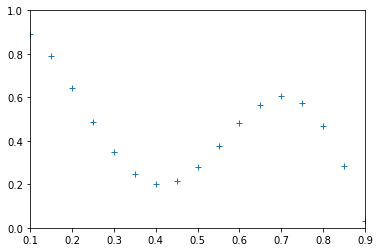

In [2]:
import matplotlib.pyplot as plt

# 훈련 데이터 분포
plt.plot(X_train, y_train, '+')
plt.xlim([0.1, 0.9])
plt.ylim([0, 1.])
plt.show()

In [5]:
import os
import random

# 실험결과 동일화를 위하여, 모든 random seed를 고정 
def set_seeds(seed):
    os.environ['PYTHONHASHSEED'] = str(seed)
    random.seed(seed)
    tf.random.set_seed(seed)
    np.random.seed(seed)
    
set_seeds(0)

In [6]:
from tensorflow.keras import Sequential  # 모듈(변수나 함수를 포함)만 불러오기
from tensorflow.keras.initializers import RandomUniform
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# -0.5에서 +0.5 사이로 초기화
initializer = RandomUniform(minval=-0.5, maxval=0.5)

# # 모델 구조 정의하기
# model = Sequential()                  # 순차적 계층 준비
# model.add(Dense(6, input_dim=1,       # 은닉노드 6개, 입력값 1차원
#                 activation='sigmoid', # 전통적 MLP의 Sigmoid 활성함수 
#                 kernel_initializer=initializer))  # 전통적 MLP의 가중치 초기화 예시
# model.add(Dense(1, activation='linear')), # regression 문제는 선형활성함수 사용

# 모델 구조 정의하기
model = Sequential()                  # 순차적 계층 준비
model.add(Dense(6, input_dim=1,       # 은닉노드 6개, 입력값 1차원
                activation='tanh', # 전통적 MLP의 Sigmoid 활성함수 
                kernel_initializer=initializer))  # 전통적 MLP의 가중치 초기화 예시
model.add(Dense(3, 
                activation='tanh', # 전통적 MLP의 Sigmoid 활성함수 
                kernel_initializer=initializer))  # 전통적 MLP의 가중치 초기화 예시
model.add(Dense(1, activation='linear')), # regression 문제는 선형활성함수 사용


# 모델 구축하기
opt = Adam(learning_rate=0.01) # learning_rate=0.001 (default 값)
rmse = tf.keras.metrics.RootMeanSquaredError(name='rmse')
model.compile(loss='mse',         # regression 문제는 손실함수로 MSE 사용
              optimizer=opt,   # 최적화 기법으로 adam 사용
              metrics=[rmse, 'mae','mape'])

In [7]:
# 데이터 훈련하기
hist = model.fit(X_train, y_train, epochs=2000, verbose=1)

# 테스트 데이터로 평가하기
score = model.evaluate(X_test, y_test)
print('test_loss: ', score[0])
print('test_acc: ', score[1])

Epoch 1/2000
1/1 [==============================] - 2s 2s/step - loss: 0.2629 - rmse: 0.5128 - mae: 0.4665 - mape: 114.7457
Epoch 2/2000
1/1 [==============================] - 0s 14ms/step - loss: 0.2106 - rmse: 0.4589 - mae: 0.4045 - mape: 85.9041
Epoch 3/2000
1/1 [==============================] - 0s 9ms/step - loss: 0.1670 - rmse: 0.4086 - mae: 0.3521 - mape: 83.0228
Epoch 4/2000
1/1 [==============================] - 0s 11ms/step - loss: 0.1312 - rmse: 0.3623 - mae: 0.3008 - mape: 81.4505
Epoch 5/2000
1/1 [==============================] - 0s 9ms/step - loss: 0.1029 - rmse: 0.3208 - mae: 0.2508 - mape: 80.2273
Epoch 6/2000
1/1 [==============================] - 0s 8ms/step - loss: 0.0819 - rmse: 0.2863 - mae: 0.2187 - mape: 86.7578
Epoch 7/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.0681 - rmse: 0.2609 - mae: 0.2031 - mape: 99.0031
Epoch 8/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.0610 - rmse: 0.2470 - mae: 0.1917 - mape: 111.6720
Epoch

3/3 [==============================] - 0s 3ms/step
[0.9203982, 0.89104825, 0.8613546, 0.83138496, 0.8012099, 0.7709036, 0.7405429, 0.7102077, 0.6799787, 0.64993984, 0.6201755, 0.5907714, 0.5618146, 0.53339165, 0.5055906, 0.47849822, 0.45220202, 0.4267891, 0.40234548, 0.37895733, 0.35670912, 0.3356859, 0.31596994, 0.29764324, 0.2807873, 0.26547998, 0.2517993, 0.23982055, 0.22961578, 0.22125344, 0.21479847, 0.21031065, 0.20784283, 0.20744057, 0.20914073, 0.21296686, 0.21893121, 0.22702914, 0.23723778, 0.24951272, 0.26378667, 0.2799645, 0.29792297, 0.31750757, 0.33853018, 0.3607697, 0.38397092, 0.40784633, 0.43207914, 0.45632476, 0.4802192, 0.50338423, 0.5254327, 0.5459822, 0.5646582, 0.5811081, 0.5950056, 0.60606116, 0.6140285, 0.61870843, 0.61995375, 0.6176691, 0.61181116, 0.60239077, 0.5894631, 0.57312864, 0.55352604, 0.5308275, 0.50523174, 0.4769593, 0.44624704, 0.41334254, 0.3784992, 0.34197158, 0.30401343, 0.26487148, 0.22478674, 0.18398951, 0.14269756, 0.10111682, 0.05943887]


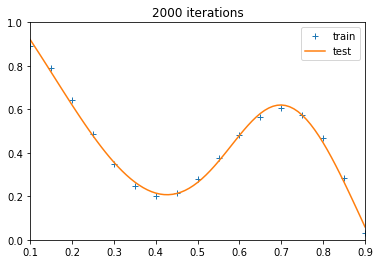

In [13]:
import matplotlib.pyplot as plt

def draw_graph(k):
    plt.plot(X_train, y_train, '+')
    plt.plot(X_test, y_pred, '-')
    plt.legend(['train','test'], loc='upper right')

    plt.title(str(k)+" iterations")
    plt.xlim([0.1, 0.9])
    plt.ylim([0, 1.])
    plt.show()
   
y_pred = model.predict(X_test)
print(list(y_pred[:,0]))
draw_graph(2000)

In [9]:
print(hist.history.keys())

dict_keys(['loss', 'rmse', 'mae', 'mape'])


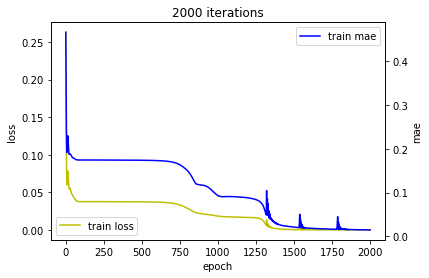

In [12]:
def loss_graph(k):
    fig, loss_ax = plt.subplots()
    acc_ax = loss_ax.twinx()

    loss_ax.plot(hist.history['loss'], 'y', label='train loss')
    acc_ax.plot(hist.history['mae'], 'b', label='train mae')

    loss_ax.set_xlabel('epoch')
    loss_ax.set_ylabel('loss')
    acc_ax.set_ylabel('mae')

    loss_ax.legend(loc='lower left')
    acc_ax.legend(loc='upper right')

    plt.title(str(k)+" iterations")
    plt.show()

loss_graph(2000)

Epoch 1/2000
5/5 - 2s - loss: 2.7816e-06 - rmse: 0.0017 - mae: 0.0015 - mape: 0.6459 - 2s/epoch - 331ms/step
Epoch 2/2000
5/5 - 0s - loss: 2.7744e-06 - rmse: 0.0017 - mae: 0.0014 - mape: 0.6457 - 16ms/epoch - 3ms/step
Epoch 3/2000
5/5 - 0s - loss: 2.7737e-06 - rmse: 0.0017 - mae: 0.0014 - mape: 0.6457 - 15ms/epoch - 3ms/step
Epoch 4/2000
5/5 - 0s - loss: 2.7734e-06 - rmse: 0.0017 - mae: 0.0014 - mape: 0.6458 - 15ms/epoch - 3ms/step
Epoch 5/2000
5/5 - 0s - loss: 2.7731e-06 - rmse: 0.0017 - mae: 0.0014 - mape: 0.6460 - 16ms/epoch - 3ms/step
Epoch 6/2000
5/5 - 0s - loss: 2.7731e-06 - rmse: 0.0017 - mae: 0.0014 - mape: 0.6461 - 15ms/epoch - 3ms/step
Epoch 7/2000
5/5 - 0s - loss: 2.7730e-06 - rmse: 0.0017 - mae: 0.0014 - mape: 0.6462 - 14ms/epoch - 3ms/step
Epoch 8/2000
5/5 - 0s - loss: 2.7729e-06 - rmse: 0.0017 - mae: 0.0014 - mape: 0.6463 - 15ms/epoch - 3ms/step
Epoch 9/2000
5/5 - 0s - loss: 2.7730e-06 - rmse: 0.0017 - mae: 0.0014 - mape: 0.6464 - 17ms/epoch - 3ms/step
Epoch 10/2000
5/5 -

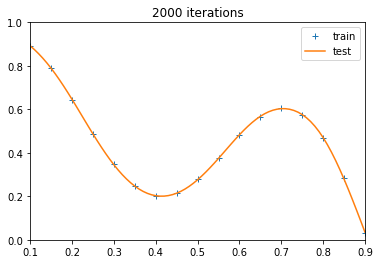

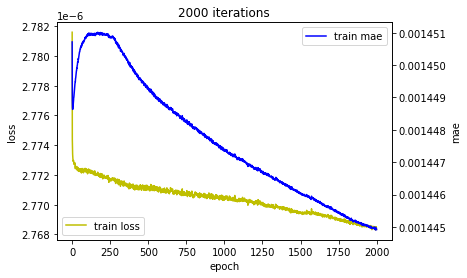

In [27]:
from sklearn.utils import shuffle

# X_train, y_train = shuffle(X_train, y_train)

def train_k_times(k = 2000):    
    global X_test, y_pred, hist
    
    # 훈련 데이터로 학습하기
    opt = Adam(0.000001) # learning_rate=0.001 (default 값)
    rmse = tf.keras.metrics.RootMeanSquaredError(name='rmse')
    # model = tf.keras.models.load_model('dnn_sincos.h5')
    model.compile(loss='mean_squared_error', optimizer=opt, metrics=[rmse, 'mae','mape'])
    hist = model.fit(X_train, y_train, epochs=k, batch_size=4, verbose=2)

    # 테스트 데이터로 평가하기
    score = model.evaluate(X_test, y_test)
    print('test_loss: ', round(score[0], 6))
    print('test_rmse: ', round(score[1], 6))
    print('test_mae: ', round(score[2], 6))
    print('test_mape: ', round(score[3], 6))
    model.save('dnn_sincos.h5')

    # 테스트 데이터의 예측값 생성하기
    y_pred = model.predict(X_test)
    print(list(y_pred[:,0]))

k = 2000
train_k_times(k)
draw_graph(k)
loss_graph(k)

In [28]:
model.get_weights()

[array([[-3.0858948e+00,  7.7087450e-04,  4.6361613e+00,  2.7877972e-03,
          1.6065677e+00, -8.7146962e-01]], dtype=float32),
 array([ 3.1011980e+00, -5.7350070e-04, -3.8889548e-01, -2.0166312e-03,
        -9.4355606e-02,  4.6215460e-01], dtype=float32),
 array([[ 3.6260481e+00, -1.1355937e+00,  4.1132765e+00],
        [-1.5852330e-04,  4.7039206e-04,  2.2686990e-03],
        [-1.6047080e+00,  1.3698833e+00, -4.0333769e-01],
        [-5.8630167e-04,  7.5468217e-04,  7.6431502e-03],
        [-1.7782865e+00, -3.6260194e-01, -1.7788625e+00],
        [ 2.0080678e+00, -3.9574236e-01,  2.4120560e+00]], dtype=float32),
 array([-0.39188373, -0.42710897, -0.5337912 ], dtype=float32),
 array([[-0.6216795 ],
        [-1.8510616 ],
        [-0.15534617]], dtype=float32),
 array([-0.04277054], dtype=float32)]

In [29]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 6)                 12        
                                                                 
 dense_4 (Dense)             (None, 3)                 21        
                                                                 
 dense_5 (Dense)             (None, 1)                 4         
                                                                 
Total params: 37
Trainable params: 37
Non-trainable params: 0
_________________________________________________________________
